<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/Stacking_Ensemble_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacking Generalization is an ensemble machine learning algorithm.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?

Unlike bagging, **in stacking, the models are typically different** (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).

Unlike boosting, **in stacking, a single model is used to learn how to best combine the predictions from the contributing models** (e.g. instead of a sequence of models that correct the predictions of prior models).

**Level-0 Models (Base-Models):** Models fit on the training data and whose predictions are compiled.


**Level-1 Model (Meta-Model):** Model that learns how to best combine the predictions of the base models.


Stacking can be implemented from scratch, although this can be challenging for beginners.

For an example of implementing stacking from scratch in Python, see the tutorial:

How to Implement Stacked Generalization (Stacking) From Scratch With Python
For an example of implementing stacking from scratch for deep learning, see the tutorial:

How to Develop a Stacking Ensemble for Deep Learning Neural Networks in Python
The scikit-learn Python machine learning library provides an implementation of stacking for machine learning.



# Import the Libraries

In [ ]:
# 1. compare standalone models for binary classification
# 2. compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

# Helper functions

In [ ]:
# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
 return X, y

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


**Generate the data**

In [ ]:
X, y = get_dataset()

# Evaluate the models

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.829 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


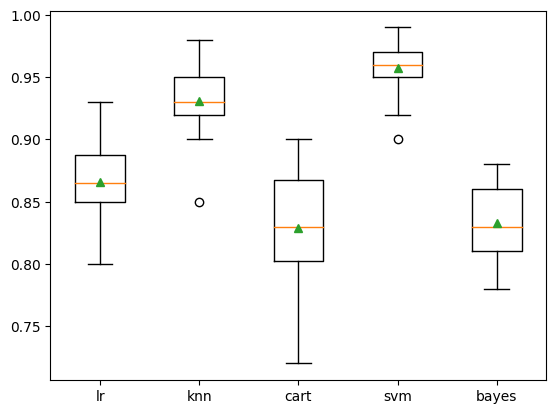

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We can see that in this case, SVM performs the best with about 95.7 percent mean accuracy.

A box-and-whisker plot is then created comparing the distribution accuracy scores for each model, allowing us to clearly see that KNN and SVM perform better on average than LR, CART, and Bayes.

# Compare the models to Stacking

We have five different algorithms that perform well, presumably in different ways on this dataset.

Next, we can try to combine these five models into a single ensemble model using stacking.

We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.



In [ ]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('lr', LogisticRegression()))
 level0.append(('knn', KNeighborsClassifier()))
 level0.append(('cart', DecisionTreeClassifier()))
 level0.append(('svm', SVC()))
 level0.append(('bayes', GaussianNB()))
 # define meta learner model
 level1 = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
 return model

In [ ]:
# get a list of models to evaluate
def get_models_stacking():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['svm'] = SVC()
 models['bayes'] = GaussianNB()
 models['stacking'] = get_stacking()
 return models

In [ ]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [ ]:
# define dataset
X, y = get_dataset()

In [ ]:
# get the models to evaluate
models = get_models_stacking()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison


>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.826 (0.041)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.963 (0.018)


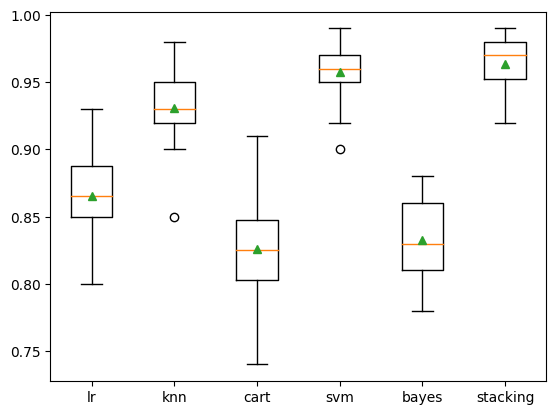

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Here, we can see that the mean and median accuracy for the stacking model sits slightly higher than the SVM model.



If we choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.

First, the stacking ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset

# Make a prediction with the Stacking Ensemble

Running the example fits the stacking ensemble model on the entire dataset and is then used to make a prediction on a new row of data, as we might when using the model in an application.

Define the stack

# Use the model to make a prediction

In [ ]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()

In [ ]:
model_stack = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model_stack.fit(X, y)
# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model_stack.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0
